<a href="https://colab.research.google.com/github/srijanmishra08/Linear-reggression/blob/main/naive_bayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Breast cancer data.csv to Breast cancer data.csv


In [ ]:
import numpy as np
import matplotlib.pyplot as mpl
import pandas as pd

In [ ]:
dataset = pd.read_csv('Breast cancer data.csv')  
x = dataset.iloc[:, :2].values  
y = dataset.iloc[:, -1].values  
print(dataset)

     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     diagnosis  
0            0  
1            0  
2           

In [ ]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 80  21]
 [  7 177]]


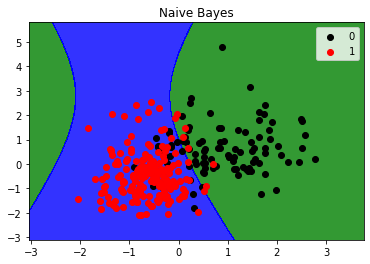

In [ ]:
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),  
                     np.arange(start = x_set[:, -1].min() - 1, stop = x_set[:, -1].max() + 1, step = 0.01))  
mpl.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),  
             alpha = 0.80, cmap = ListedColormap(('g', 'b')))  
mpl.xlim(X1.min(), X1.max())  
mpl.ylim(X2.min(), X2.max())  
for i, j in enumerate(np.unique(y_set)):  
    mpl.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
                c = ListedColormap(('k', 'r'))(i), label = j)  
mpl.title('Naive Bayes')  
mpl.legend()  
mpl.show()